In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 250

In [2]:
ls

Alpha_Keto_Output.csv              Untitled.ipynb
MenD_Classifier.ipynb              substrate_selection_mordred.ipynb
Product_LogP.ipynb                 zinc_alpha_keto_acids.smi
RT_model/


In [3]:
reactions = pd.read_csv('Alpha_Keto_Output.csv')
reactions.head()

,Index,Reactant_1_SMILES,Reactant_1_Name,Reactant_1_Monoisotopic_Mass,Reactant_2_SMILES,Reactant_2_Name,Reactant_2_Monoisotopic_Mass,Intermediates,Intermediates_Monoisotopic_Mass,Final_Product,CO2_Fall_Off_Intermediate,CO2_Fall_Off_Intermediate_Monoisotopic_Mass
0,0,CSCCC(=O)C(=O)O,Alpha-keto-gamma-(methylthio)butyrate acid sod...,148.0194,CSCCC(=O)C(=O)O,Alpha-keto-gamma-(methylthio)butyrate acid sod...,148.0194,CSCCC(=O)C(O)(CCSC)C(=O)O,252.0490,CSCCCCCCSC,CSCCC(=O)C(O)CCSC,208.0592
1,1,CSCCC(=O)C(=O)O,Alpha-keto-gamma-(methylthio)butyrate acid sod...,148.0194,O=C(O)C(=O)Cc1ccc(O)cc1,4-hydroxyphenylpyruvic acid,180.0423,CSCCC(=O)C(O)(Cc1ccc(O)cc1)C(=O)O;CSCCC(O)(C(=...,284.0718,CSCCCCCc1ccc(O)cc1,CSCCC(O)C(=O)Cc1ccc(O)cc1;CSCCC(=O)C(O)Cc1ccc(...,240.0820
2,2,CSCCC(=O)C(=O)O,Alpha-keto-gamma-(methylthio)butyrate acid sod...,148.0194,CCCCCCC(=O)C(=O)O,2-oxooctanoic acid,158.0943,CCCCCCC(O)(C(=O)O)C(=O)CCSC;CCCCCCC(=O)C(O)(CC...,262.1239,CCCCCCCCCCSC,CCCCCCC(=O)C(O)CCSC;CCCCCCC(O)C(=O)CCSC,218.1341
3,3,CSCCC(=O)C(=O)O,Alpha-keto-gamma-(methylthio)butyrate acid sod...,148.0194,O=C(O)C(=O)Cc1cnc[nH]1,Imidazolepyruvic acid hydrobromide hydrate,154.0378,CSCCC(=O)C(O)(Cc1cnc[nH]1)C(=O)O;CSCCC(O)(C(=O...,258.0674,CSCCCCCc1cnc[nH]1,CSCCC(O)C(=O)Cc1cnc[nH]1;CSCCC(=O)C(O)Cc1cnc[nH]1,214.0776
4,4,CSCCC(=O)C(=O)O,Alpha-keto-gamma-(methylthio)butyrate acid sod...,148.0194,O=C(O)CCCC(=O)C(=O)O,2-oxoadipic acid,160.0372,CSCCC(=O)C(O)(CCCC(=O)O)C(=O)O;CSCCC(O)(C(=O)O...,264.0668,CSCCCCCCCC(=O)O,CSCCC(=O)C(O)CCCC(=O)O;CSCCC(O)C(=O)CCCC(=O)O,220.0769


In [5]:
substrates = reactions.loc[:,"Reactant_1_SMILES":"Reactant_1_Monoisotopic_Mass"]
substrates.sort_values("Reactant_1_Monoisotopic_Mass", inplace = True)
substrates.drop_duplicates(subset ="Reactant_1_Name", keep = 'first' , inplace = True) 
substrates.index=range(len(substrates))
substrates.rename(columns = {"Reactant_1_SMILES":'SMILES',"Reactant_1_Name":"name", "Reactant_1_Monoisotopic_Mass":"mass"}, inplace = True)
substrate_masses = substrates.loc[:,'mass']

In [23]:
all_masses = np.concatenate((substrate_masses.values, reactions.loc[:,'CO2_Fall_Off_Intermediate_Monoisotopic_Mass'].values, reactions.loc[:,'Intermediates_Monoisotopic_Mass'].values), axis=0)

In [25]:
len(all_masses)

960

In [28]:
plt.bar(all_masses)

TypeError: bar() missing 1 required positional argument: 'height'

In [36]:
unique_masses = pd.DataFrame(all_masses).drop_duplicates(keep = 'first')
len(unique_masses)

694

In [39]:
counts = pd.Series(all_masses).value_counts()

In [45]:
pd.DataFrame(counts)

,0
174.0892,9
216.1362,9
202.1205,9
188.1049,9
236.1049,7
...,...
206.0427,1
248.0896,1
372.1144,1
369.1246,1


Text(0.5, 1.0, 'Total Number of Isobaric Species in All Reactions')

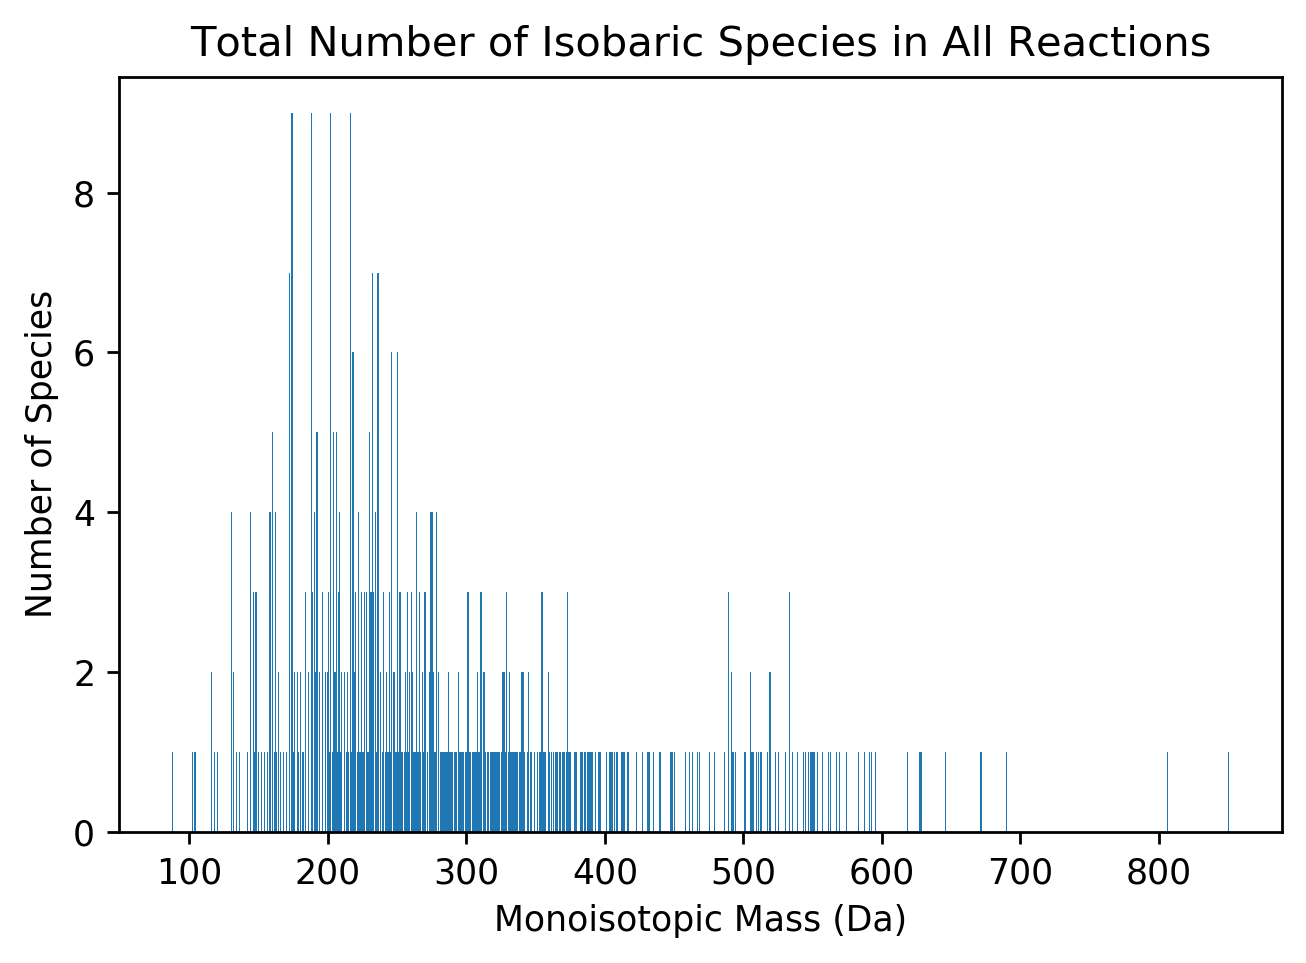

In [48]:
plt.bar(pd.DataFrame(counts).index, pd.DataFrame(counts)[0])
plt.xlabel('Monoisotopic Mass (Da)')
plt.ylabel('Number of Species')
plt.title('Total Number of Isobaric Species in All Reactions')